In [1]:
import ROOT as r
import math
import array
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import pandas as pd
from scipy.optimize import curve_fit


#______________Add include directory_______________
current_dir = os.getcwd()
include_dir = os.path.join(current_dir, '../include')
sys.path.insert(0, include_dir)
#__________________________________________________
import ERROR
import CONFIG
import DBPARSE
from PXPY import *
from ASYMMETRY import *
from UTILITIES import *
from SIMFITS import DistributionFits
from ROOT import gStyle, TChain, TH1F, TCanvas, TLegend
import CORRECTIONS
import CALCULATE
import GETFF
from joblib import Parallel, delayed
import importlib
#importlib.reload(ASYMMETRY)

Welcome to JupyROOT 6.26/06


In [2]:
import numpy as np

# Load the data, skipping the header row
data = np.loadtxt("DB/timing/vimukthioffsets.txt", delimiter=",", skiprows=1)

# Split into separate arrays
v_t0 = data[:, 0]
v_wL = data[:, 1]
v_wR = data[:, 2]
v_vscint = data[:, 3]

# Example usage
print("t0:", v_t0[:5])
print("wL:", v_wL[:5])
print("wR:", v_wR[:5])
print("vscint:", v_vscint[:5])


t0: [ 0.31102   -0.0200318  0.0100931 -2.80693   -1.56615  ]
wL: [0.438704 0.411434 0.369451 0.265763 0.266318]
wR: [0.335503 0.338553 0.301562 0.194656 0.251506]
vscint: [0.127461 0.136872 0.126709 0.122732 0.130008]


In [3]:
Pass="2"
config="2"
useGrinch=False
base_dir = f"/media/research/TOSHIBA EXT/GEn/NumpyData/Pass{Pass}/GEN{config}/Timing"

In [4]:
etof0 = (1.96+3.0)/0.299792458
c = 0.299792458
zhodo = 1.854454
Lbar_hodo = 0.6
vscint_default = 0.16 
wL_default = 0.3
wR_default = 0.21


fresh=True
if fresh:
    v_OLD = np.full(90, vscint_default)
    wL_OLD = np.full(90, wL_default)
    wR_OLD = np.full(90, wR_default)
    t0_OLD=np.full(90,0)
else:
    v_OLD = np.load(f"DB/timing/GEN{config}_t0.npy")
    wL_OLD = np.load(f"DB/timing/GEN{config}_wL.npy")
    wR_OLD = np.load(f"DB/timing/GEN{config}_wR.npy")
    t0_OLD= np.load(f"DB/timing/GEN{config}_vscint.npy")
Lbar_hodo = 0.6

In [5]:
print(np.round(t0_OLD,2))

print(np.round(wL_OLD,2))

print(np.round(wR_OLD,2))

print(np.round(v_OLD,2))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3
 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3 0.3]
[0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21
 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21
 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21
 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21
 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21
 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21 0.21
 0.21 0.21 0.21 0.21 0.2

In [6]:
W2min=CONFIG.Function_JSON("W2min",f"../config/Pass{Pass}/cuts{config}.cfg")
W2max=CONFIG.Function_JSON("W2max",f"../config/Pass{Pass}/cuts{config}.cfg")
dxmin=CONFIG.Function_JSON("dxmin",f"../config/Pass{Pass}/cuts{config}.cfg")
dxmax=CONFIG.Function_JSON("dxmax",f"../config/Pass{Pass}/cuts{config}.cfg")
dymin=CONFIG.Function_JSON("dymin",f"../config/Pass{Pass}/cuts{config}.cfg")
dymax=CONFIG.Function_JSON("dymax",f"../config/Pass{Pass}/cuts{config}.cfg")
dybgmin=CONFIG.Function_JSON("dybgmin",f"../config/Pass{Pass}/cuts{config}.cfg")
dybgmax=CONFIG.Function_JSON("dybgmax",f"../config/Pass{Pass}/cuts{config}.cfg")
coinmin=CONFIG.Function_JSON("coinmin",f"../config/Pass{Pass}/cuts{config}.cfg")
coinmax=CONFIG.Function_JSON("coinmax",f"../config/Pass{Pass}/cuts{config}.cfg")
Q2=CONFIG.Function_JSON("Q2",f"../config/Pass{Pass}/cuts{config}.cfg")

#  "dxmin"	: -0.481,
#  "dxmax"	: 0.498, old gen2


print(f'W2min: {W2min}')
print(f'W2max: {W2max}')
print(f'dxmin: {dxmin}')
print(f'dxmax: {dxmax}')
print(f'dymin: {dymin}')
print(f'dymax: {dymax}')
print(f'dybgmin: {dybgmin}')
print(f'dybgmax: {dybgmax}')
print(f'Q2: {Q2}')
print(f'Coin Min: {coinmin} Coin Max: {coinmax}')



W2min: 0
W2max: 1.5
dxmin: -0.481
dxmax: 0.498
dymin: -0.822
dymax: 0.8
dybgmin: -1.4
dybgmax: 1.4
Q2: 3
Coin Min: 128 Coin Max: 139


In [7]:
generic=np.load(f"{base_dir}/timingtest0.npz")


In [8]:
tleft=generic["tleft"]
tright=generic["tright"]
totleft=generic["totleft"]
totright=generic["totright"]
vpos=generic["vpos"]
barid=generic["barid"]
nbars=generic["nbars"]
bb_rftime=generic["bb_rftime"]
sbs_rftime=generic["sbs_rftime"]
bb_trigtime=generic["bbtrigtime"]
sbs_trigtime=generic["sbstrigtime"]
HODOraw=generic["HODOtmean"]
tdctimeblk=generic["tdctimeblk"]
eblk=generic["eblk"]
idblk=generic["idblk"]
vz=generic["vz"]
pathl=generic["pathl"]
barid = np.where(barid == 0, -1, barid) 
tr_x=generic["tr_x"]
tr_y=generic["tr_y"]
tr_th=generic["tr_th"]
tr_ph=generic["tr_ph"]
HCALtw=generic["HCALtw"]
dx=generic["dx"]
dy=generic["dy"]
w2=generic["W2"]
cblkid=generic["cblkid"]
cblke=generic["cblke"]
cblktime=generic["cblktime"]
nblk=generic["nblk"]
pN_expect=generic["pN_expected"]
npathl=generic["npathl"]


cut=(dxmin<dx)&(dxmax>dx)&(dymin<dy)&(dymax>dy)&(W2min<w2)&(W2max>w2)
primarybarid=np.transpose(barid)[0]
primaryblkid=np.transpose(cblkid)[0]



In [9]:
#generic["cblktime"][0][1]

In [149]:
def HodoLoop(tleft, tright, totleft, totright, barid, nbars, ytrack, phtrack, pathl,
                  etof0, Lbar_hodo,t0_OLD,wL_OLD,wR_OLD,v_OLD, c=0.299792458, n_bars=90):

    nparams = 4 * n_bars  # t0, wL, wR, 1/v per bar
    M = np.zeros((nparams, nparams))
    b = np.zeros(nparams)
    event_counts = np.zeros(n_bars)

    #Sexy progress tracker____________________________________
    for i in range(len(nbars)):
        if i % 10000 == 0:
            progress = (f"{i/len(nbars)*100:.4f}% complete\r")
            sys.stdout.write(progress)
            sys.stdout.flush()
    #Sexy progress tracker____________________________________
           
            
            
        n = nbars[i]
        if n < 1 or not np.isfinite(pathl[i]) or not np.isfinite(ytrack[i]):
            continue
       
        yhodo = ytrack[i] + zhodo*phtrack[i]
    
        etof = pathl[i] / c - etof0

        for j in range(n):
            b_id = int(barid[i, j])
            if b_id < 0 or b_id >= n_bars:
                continue

            tL = tleft[i, j]
            tR = tright[i, j]
            TOTL = totleft[i, j]
            TOTR = totright[i, j]
            
            if tL==0 or tR==0 or TOTL==0 or TOTR==0:
                continue
            if not all(np.isfinite([tL, tR, TOTL, TOTR])):
                continue
            dL = np.clip(Lbar_hodo / 2 - yhodo, 0, Lbar_hodo)
            dR = np.clip(Lbar_hodo / 2 + yhodo, 0, Lbar_hodo)
            
            #totmean=.5*(TOTL+TOTR)
            #tmean_raw=.5*(tL+tR)-(etof-etof0)
            #tdiff_raw=tL-tR
            #tleft_corr=tL-etof-t0[b_id]-HODOwL[b_id]*TOTL-dL/vscint[b_id]
            #tright_corr=tR-etof-t0[b_id]-HODOwR[b_id]*TOTR-dR/vscint[b_id]
            
            
            
            lhs_L = tL-etof
            lhs_R = tR-etof

            i_t0 = b_id
            i_wL = b_id + n_bars
            i_wR = b_id + 2 * n_bars
            i_inv_v = b_id + 3 * n_bars

            # Left PMT equations
            M[i_t0, i_t0] += 1
            M[i_t0, i_wL] += TOTL
            M[i_t0, i_inv_v] += dL
            M[i_wL, i_t0] += TOTL
            M[i_wL, i_wL] += TOTL**2
            M[i_wL, i_inv_v] += TOTL * dL
            M[i_inv_v, i_t0] += dL
            M[i_inv_v, i_wL] += TOTL * dL
            M[i_inv_v, i_inv_v] += dL**2
            
            b[i_t0] += lhs_L
            b[i_wL] += lhs_L * TOTL
            b[i_inv_v] += lhs_L * dL
            

            # Right PMT equations
            M[i_t0, i_t0] += 1
            M[i_t0, i_wR] += TOTR
            M[i_t0, i_inv_v] += dR
            M[i_wR, i_t0] += TOTR
            M[i_wR, i_wR] += TOTR**2
            M[i_wR, i_inv_v] += TOTR * dR
            M[i_inv_v, i_t0] += dR
            M[i_inv_v, i_wR] += TOTR * dR
            M[i_inv_v, i_inv_v] += dR**2

            
            
            b[i_t0] += lhs_R
            b[i_wR] += lhs_R * TOTR
            b[i_inv_v] += lhs_R * dR
            event_counts[b_id] += 1

    return M, b, event_counts


def chunkload_andsolve(base_dir, func,t0_OLD,wL_OLD,wR_OLD,v_OLD, n_bars=90, min_events=50):
 
    M_total = np.zeros((4 * n_bars, 4 * n_bars))
    b_total = np.zeros(4 * n_bars)
    event_counts_total = np.zeros(n_bars)
    
    i = 0
    while os.path.exists(f"{base_dir}/timing{i}.npz"):
        
        print(f"Processing chunk {i}")
        data = np.load(f"{base_dir}/timing{i}.npz")
        w2=data["W2"]
        wcut=(w2>0)&(w2<2)
    
        barid = data["barid"][wcut, :]
        tleft = data["tleft"][wcut, :]
        tright = data["tright"][wcut, :]
        totleft = data["totleft"][wcut, :]
        totright = data["totright"][wcut, :]
        nbars = data["nbars"][wcut]
        ytrack = data["tr_y"][wcut]
        phtrack = data["tr_ph"][wcut]
        pathl = data["pathl"][wcut]

        
        
        M, b, event_counts = func(
            tleft, tright, totleft, totright, barid,
            nbars, tr_y, tr_ph, pathl,etof0,Lbar_hodo,
            t0_OLD,wL_OLD,wR_OLD,v_OLD
        )

        M_total += M
        b_total += b
        event_counts_total += event_counts
        i += 1

    # Regularize underpopulated bars
    for b_id in range(n_bars):
        if event_counts_total[b_id] < min_events:
            for idx in [b_id, b_id + n_bars, b_id + 2 * n_bars, b_id + 3 * n_bars]:
                M_total[idx, :] = 0
                M_total[:, idx] = 0
                M_total[idx, idx] = 1
                b_total[idx] = 0

    params = np.linalg.lstsq(M_total, b_total, rcond=None)[0]
    t0 = params[0:n_bars]
    wL = params[n_bars:2*n_bars]
    wR = params[2*n_bars:3*n_bars]
    vscint = 1.0 / params[3*n_bars:4*n_bars]
    
    #t0      = params[0:n_bars]
    #vscint  = 1.0 / params[n_bars:2*n_bars]  # take reciprocal
    #wL      = params[2*n_bars:3*n_bars]
    #wR      = params[3*n_bars:4*n_bars]


    return t0, wL, wR, vscint, event_counts_total


In [77]:
HODOt0, HODOwL, HODOwR, vscint_fixed, total_counts = chunkload_andsolve(base_dir, HodoLoop,
                                                                                t0_OLD,wL_OLD,wR_OLD,v_OLD)
print(np.round(HODOt0,2))
print(np.round(HODOwL,2))
print(np.round(HODOwR,2))
print(np.round(vscint_fixed,2))



Processing chunk 0
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
[ 6.900e+00  7.830e+00  8.600e+00  7.960e+00  9.390e+00  1.045e+01
  1.160e+01  9.610e+00  9.110e+00  1.208e+01  9.930e+00  9.760e+00
  1.083e+01  9.980e+00  9.670e+00  9.430e+00  9.380e+00  9.190e+00
  8.340e+00  9.150e+00  9.220e+00  8.940e+00  8.440e+00  8.790e+00
  9.490e+00  9.830e+00  9.880e+00  1.033e+01  9.880e+00  1.111e+01
  4.590e+00  1.013e+01  9.800e+00  1.043e+01  9.870e+00  9.490e+00
  1.085e+01  1.073e+01  1.131e+01  1.182e+01  1.107e+01  1.027e+01
  1.007e+01  1.113e+01  1.086e+01  1.059e+01  1.087e+01  1.135e+01
  1.194e+01  1.128e+01  1.159e+01  1.104e+01  1.051e+01  1.199e+01
  1.213e+01  1.158e+01  1.180e+01  1.029e+01  1.060e+01  1.162e+01
  1.249e+01  1.251e+01  1.242e+01  1.351e+01  1.213e+01  1.196e+01
  1.233e+01  1.174e+01  9.840e+00  9.710e+00  1.010e+01  1.040e+01
  1.01

/tmp/ipykernel_6881/1490020785.py:147: RuntimeWarning: divide by zero encountered in divide
  vscint = 1.0 / params[3*n_bars:4*n_bars]


In [78]:
np.save(f"DB/timing/GEN{config}_t0.npy",HODOt0)
np.save(f"DB/timing/GEN{config}_wL.npy",HODOwL)
np.save(f"DB/timing/GEN{config}_wR.npy",HODOwR)
np.save(f"DB/timing/GEN{config}_vscint.npy",vscint_fixed)

In [11]:
HODOt0=np.load(f"DB/timing/GEN{config}_t0.npy")
HODOwL=np.load(f"DB/timing/GEN{config}_wL.npy")
HODOwR=np.load(f"DB/timing/GEN{config}_wR.npy")
vscint_fixed=np.load(f"DB/timing/GEN{config}_vscint.npy")

In [148]:
def applyHodoCorrection(
    tleft, tright, totleft, totright, barid, nbars, pathl,ytrack,phtrack,
    t0, wL, wR, vscint
):
    n_events = len(nbars)
    HODOcorrected = np.full(n_events, np.nan)

    for i in range(n_events):
        n = nbars[i]
        if n < 1 or not np.isfinite(pathl[i]):
            continue

        etof = pathl[i] / c - etof0

        weighted_sum = 0.0
        weight_total = 0.0

        for j in range(n):
            b = int(barid[i, j])
            if b < 0 or b >= len(t0):
                continue
            
            tL = tleft[i, j]
            tR = tright[i, j]
            TOTL = totleft[i, j]
            TOTR = totright[i, j]

            if not all(np.isfinite([tL, tR, TOTL, TOTR])):
                continue
            yhodo = ytrack[i] + zhodo*phtrack[i]
            dLEFT = np.clip(Lbar_hodo / 2 - yhodo, 0, Lbar_hodo)
            dRIGHT = np.clip(Lbar_hodo / 2 + yhodo, 0, Lbar_hodo)

            tL_corr = tL - etof - t0[b] - wL[b] * TOTL - dLEFT / vscint[b]
            tR_corr = tR - etof - t0[b] - wR[b] * TOTR - dRIGHT / vscint[b]
            tmean_corr = 0.5 * (tL_corr + tR_corr)

            weight = TOTL + TOTR
            weighted_sum += weight * tmean_corr
            weight_total += weight

        if weight_total > 0:
            HODOcorrected[i] = weighted_sum / weight_total

    return HODOcorrected


In [13]:
HODOcorrected = applyHodoCorrection(
    tleft, tright, totleft, totright, barid, nbars, pathl,tr_y,tr_ph,
    HODOt0, HODOwL, HODOwR, vscint_fixed
)


In [14]:
len(HODOcorrected[np.isnan(HODOcorrected)])

372387

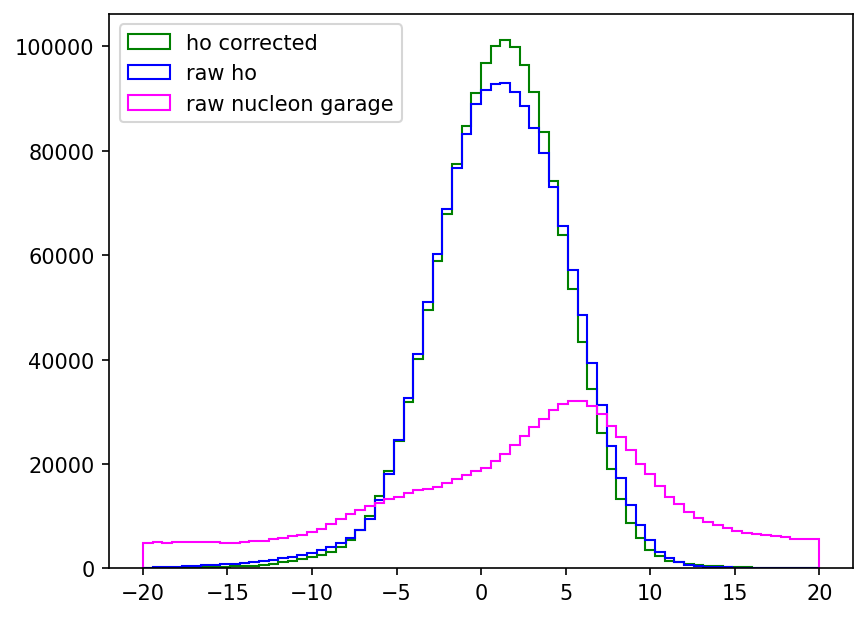

In [115]:
plt.figure(dpi=150)
d=plt.hist(HODOcorrected[~np.isnan(HODOcorrected)]+3,histtype='step',
           bins=70,range=(-20,20),color='green',label='ho corrected')
d=plt.hist(HODOraw[~np.isnan(HODOcorrected)],histtype='step',
           bins=70,range=(-20,20),color='blue',label='raw ho')
#d=plt.hist(tdctimeblk[cut],histtype='step',
 #          bins=200,range=(-50,50),color='red')
d=plt.hist(tdctimeblk[~np.isnan(HODOcorrected)],histtype='step',
           bins=70,range=(-20,20),color='magenta',label='raw nucleon garage')
plt.legend(loc='upper left')
#plt.axvline(-3.5)
#plt.axvline(1.5)
#plt.axvline(-8.5)

In [16]:
nancheck=(~np.isnan(HODOcorrected))

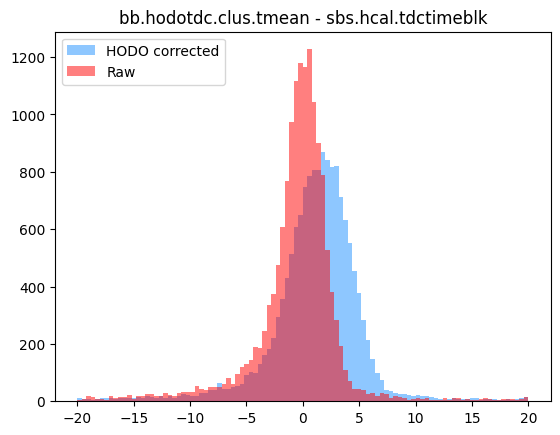

In [17]:
d=plt.hist(HODOcorrected[cut&nancheck]-tdctimeblk[cut&nancheck]+4,bins=100,range=(-20,20),color='dodgerblue',alpha=.5,
          label='HODO corrected')
d=plt.hist(HODOraw[cut&nancheck]-tdctimeblk[cut&nancheck],bins=100,range=(-20,20),color='red',alpha=.5,
          label='Raw')
plt.title("bb.hodotdc.clus.tmean - sbs.hcal.tdctimeblk")
plt.legend(loc="upper left")

# Histogram type shit 

In [527]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def BuildHistys(
    tleft, tright, totleft, totright, barid, nbars, pathl,ytrack,phtrack,
    t0, wL, wR, vscint,
    output_pdf="../outfiles/PDF/hodo_histograms.pdf"
):
    hist_data = {
        b: {
            "tL_raw": [], "tR_raw": [], "tmean_raw": [],
            "tL_corr": [], "tR_corr": [], "tmean_corr": [],
            "TOTL": [], "TOTR": [],
            "tL_corr_2D": [], "tR_corr_2D": []
        } for b in range(90)
    }

    n_events = len(nbars)

    for i in range(n_events):
        n = nbars[i]
        if n < 1 or not np.isfinite(pathl[i]):
            continue

        etof = pathl[i] / c - etof0

        for j in range(n):
            b = int(barid[i, j])
            if b < 0 or b >= 90:
                continue

            tL = tleft[i, j]
            tR = tright[i, j]
            TOTL = totleft[i, j]
            TOTR = totright[i, j]

            if not all(np.isfinite([tL, tR, TOTL, TOTR])):
                continue

            tmean_raw = 0.5 * (tL + tR)

            yhodo = ytrack[i] + zhodo*phtrack[i]
            dLEFT = np.clip(Lbar_hodo / 2 - yhodo, 0, Lbar_hodo)
            dRIGHT = np.clip(Lbar_hodo / 2 + yhodo, 0, Lbar_hodo)

            tL_corr = tL - etof - t0[b] - wL[b] * TOTL - dLEFT / vscint[b]
            tR_corr = tR - etof - t0[b] - wR[b] * TOTR - dRIGHT / vscint[b]
            tmean_corr = 0.5 * (tL_corr + tR_corr)

            hist_data[b]["tL_raw"].append(tL)
            hist_data[b]["tR_raw"].append(tR)
            hist_data[b]["tmean_raw"].append(tmean_raw)
            hist_data[b]["tL_corr"].append(tL_corr)
            hist_data[b]["tR_corr"].append(tR_corr)
            hist_data[b]["tmean_corr"].append(tmean_corr)

            hist_data[b]["TOTL"].append(TOTL)
            hist_data[b]["TOTR"].append(TOTR)
            hist_data[b]["tL_corr_2D"].append(tL_corr)
            hist_data[b]["tR_corr_2D"].append(tR_corr)

    with PdfPages(output_pdf) as pdf:
        for b in range(90):
            ### PAGE 1: 6 time histograms ###
            fig, axs = plt.subplots(3, 2, figsize=(12, 10))
            fig.suptitle(f"Hodo Bar {b} - Timing Distributions", fontsize=16)

            axs[0, 0].hist(hist_data[b]["tL_raw"], bins=100, alpha=0.75)
            axs[0, 0].set_title("tL raw")

            axs[0, 1].hist(hist_data[b]["tR_raw"], bins=100, alpha=0.75)
            axs[0, 1].set_title("tR raw")

            axs[1, 0].hist(hist_data[b]["tmean_raw"], bins=100, alpha=0.75)
            axs[1, 0].set_title("tmean raw")

            axs[1, 1].hist(hist_data[b]["tL_corr"], bins=100, alpha=0.75)
            axs[1, 1].set_title("tL corrected")

            axs[2, 0].hist(hist_data[b]["tR_corr"], bins=100, alpha=0.75)
            axs[2, 0].set_title("tR corrected")

            axs[2, 1].hist(hist_data[b]["tmean_corr"], bins=100, alpha=0.75)
            axs[2, 1].set_title("tmean corrected")

            for ax in axs.flat:
                ax.set_xlabel("Time [ns]")
                ax.set_ylabel("Entries")

            plt.tight_layout(rect=[0, 0, 1, 0.96])
            pdf.savefig(fig)
            plt.close(fig)

            ### PAGE 2: 2D histograms ###
            fig2, axs2 = plt.subplots(2, 2, figsize=(12, 10))
            fig2.suptitle(f"Hodo Bar {b} - TOT vs Time", fontsize=16)

            axs2[0, 0].hist2d(hist_data[b]["TOTL"], hist_data[b]["tL_raw"], bins=100)
            axs2[0, 0].set_title("TOTL vs tL raw")

            axs2[0, 1].hist2d(hist_data[b]["TOTL"], hist_data[b]["tL_corr_2D"], bins=100)
            axs2[0, 1].set_title("TOTL vs tL corrected")

            axs2[1, 0].hist2d(hist_data[b]["TOTR"], hist_data[b]["tR_raw"], bins=100)
            axs2[1, 0].set_title("TOTR vs tR raw")

            axs2[1, 1].hist2d(hist_data[b]["TOTR"], hist_data[b]["tR_corr_2D"], bins=100)
            axs2[1, 1].set_title("TOTR vs tR corrected")

            for ax in axs2.flat:
                ax.set_xlabel("TOT [ns]")
                ax.set_ylabel("Time [ns]")

            plt.tight_layout(rect=[0, 0, 1, 0.96])
            pdf.savefig(fig2)
            plt.close(fig2)

    print(f"Histograms saved to {output_pdf}")


In [528]:
BuildHistys(tleft, tright, totleft, totright, barid, nbars, pathl,tr_y,tr_ph,
    HODOt0, HODOwL, HODOwR, vscint_fixed)

Histograms saved to hodo_histograms.pdf


# HCAL

In [18]:
def calc_tof(pathl, p, m):
    beta = p / np.sqrt(p**2 + m**2)
    return pathl / (beta * c)


In [90]:
ID=[]
def HCALLoop(hcal_blk_id, hcal_blk_e, hcal_blk_tdctime,nblks,pN_expect,npathl,
              n_blocks=288):

    nparams = 4 * n_blocks  # t1, w0, w1, rf offset
    M = np.zeros((nparams, nparams))
    b = np.zeros(nparams)
    event_counts = np.zeros(n_blocks)
    #print("got here")

    for i in range(len(nblks)):
        nhcal = nblks[i]
        if nhcal>10:
            nhcal=10
        #Using proton mass because there are more of them XD
        ntof0=calc_tof(17,pN_expect[i],.938)        
        ntof=calc_tof(npathl[i],pN_expect[i],.938)-ntof0
        #print(nhcal)
        for j in range(0,int(nhcal)):
            #print("  "+str(j))
            #print(nhcal)
            block_id = int(hcal_blk_id[i][j])
            if block_id < 0 or block_id >= n_blocks:
                continue

            e = hcal_blk_e[i][j]
            t = hcal_blk_tdctime[i][j]-ntof
            blkid=hcal_blk_id[i][j]
            ID.append(int(blkid))
            if e <= 0: continue
            if not np.isfinite(t):  continue
            if abs(t)>30: 
                nhcal-=1 
                continue
                
            #print("   "+str(t)+"  "+str(blkid)+"  "+str(e))
            ipar_t1 = block_id
            ipar_w0 = block_id + n_blocks
            ipar_w1 = block_id + 2 * n_blocks

            # Fill M
            M[ipar_t1, ipar_t1] += 1
            M[ipar_t1, ipar_w0] += e
            M[ipar_t1, ipar_w1] += 1 / np.sqrt(e)

            M[ipar_w0, ipar_t1] += e
            M[ipar_w0, ipar_w0] += e ** 2
            M[ipar_w0, ipar_w1] += np.sqrt(e)

            M[ipar_w1, ipar_t1] += 1 / np.sqrt(e)
            M[ipar_w1, ipar_w0] += np.sqrt(e)
            M[ipar_w1, ipar_w1] += 1 / e

            # Fill b
            b[ipar_t1] += t
            b[ipar_w0] += t * e
            b[ipar_w1] += t * (1 / np.sqrt(e))

            event_counts[block_id] += 1

    return M, b, event_counts


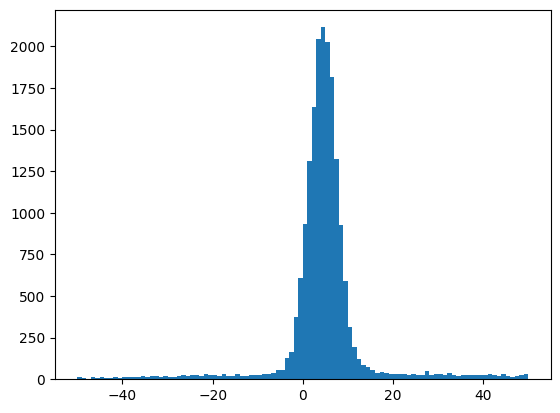

In [91]:
cut=(W2min<w2)&(W2max>w2)&(dymin<dy)&(dymax>dy)&(dxmin<dx)&(dxmax>dx)
d=plt.hist(tdctimeblk[cut],range=(-50,50),bins=100)


In [92]:
cut=(W2min<w2)&(W2max>w2)&(dymin<dy)&(dymax>dy)&(dxmin<dx)&(dxmax>dx)

In [93]:
def chunkload_andsolve_HCAL(base_dir, func, n_blocks=288, min_events=50):
    M_total = np.zeros((4 * n_blocks, 4 * n_blocks))
    b_total = np.zeros(4 * n_blocks)
    event_counts_total = np.zeros(n_blocks)

    i = 0
    while os.path.exists(f"{base_dir}/timingtest{i}.npz"):
        print(f"Processing chunk", i)
        data = np.load(f"{base_dir}/timingtest{i}.npz")
        
        w2 = data["W2"]
        dy=data["dy"]
        dx=data["dx"]
        cut=(W2min<w2)&(W2max>w2)&(dymin<dy)&(dymax>dy)&(dxmin<dx)&(dxmax>dx)

        cblkid_cut = data["cblkid"][cut, :]
        cblke_cut = data["cblke"][cut, :]
        cblktime_cut = data["cblktime"][cut, :]
        nblk_cut = data["nblk"][cut]
        pN_expect_cut = data["pN_expected"][cut]
        npathl_cut=data["npathl"][cut]

        M, b, event_counts = func(
            cblkid_cut, cblke_cut, cblktime_cut,nblk_cut, pN_expect_cut,npathl_cut)

        M_total += M
        b_total += b
        event_counts_total += event_counts
        i += 1
    # Regularize underpopulated bars
    for b_id in range(n_blocks):
        if event_counts_total[b_id] < min_events:
            for idx in [b_id, b_id + n_blocks, b_id + 2 * n_blocks, b_id + 3 * n_blocks]:
                M_total[idx, :] = 0
                M_total[:, idx] = 0
                M_total[idx, idx] = 1
                b_total[idx] = 0

    params = np.linalg.lstsq(M_total, b_total, rcond=None)[0]
    t1 = params[0:n_blocks]
    w0 = params[n_blocks:2*n_blocks]
    w1 = params[2*n_blocks:3*n_blocks]

    return t1, w0, w1, event_counts_total


In [94]:
def applyHCALCorrection(
    cblkid, cblke, cblktime, nblk, pN_expect,npathl,
    t1, w0, w1
):

    n_events = len(nblk)
    HCALcorrected = np.full(n_events, np.nan)

    for i in range(n_events):
        n = int(nblk[i])
        if n>10:
            n=10
        if n < 1 or not np.isfinite(pN_expect[i]):
            continue

        # Time-of-flight correction relative to central path
        ntof0=calc_tof(17,pN_expect[i],.938)        
        ntof=calc_tof(npathl[i],pN_expect[i],.938)-ntof0
        weighted_sum = 0.0
        weight_total = 0.0

        for j in range(n):
            blk = int(cblkid[i][j]) - 1
            if blk < 0 or blk >= len(t1):
                continue

            e = cblke[i][j]
            t = cblktime[i][j]-ntof
            if e <= 0: continue
                #continue
            if abs(t)>30: 
                n-=1 
                continue
            t_corr = (
                t - t1[blk] - w0[blk] * e - w1[blk] / np.sqrt(e) 
            )

            # Weight by energy (can be changed to sqrt(e), e^2, etc.)
            weight = e
            weighted_sum += weight * t_corr
            weight_total += weight

        if weight_total > 0:
            HCALcorrected[i] = weighted_sum / weight_total

    return HCALcorrected


In [95]:
#tdctimeblk
#eblk
#idblk

In [96]:
t1,w0,w1,events=chunkload_andsolve_HCAL(base_dir,HCALLoop)
print(t1)
print(w0)
print(w1)
print(events)

Processing chunk 0
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8
Processing chunk 9
[ 0.00000000e+00 -4.43096966e+00 -3.47976557e-01  1.24174718e-01
  1.92969684e+00 -4.07952110e-02 -2.07266302e+00 -2.36148672e+00
 -9.25555981e-01  7.68353946e-01  1.78109839e-02 -1.02764602e+00
  4.88719504e-01 -2.85903265e+00 -1.72188873e-01 -5.00757912e-01
 -2.33026380e+00 -2.59943439e+00 -2.01178463e+00 -1.85789488e+00
 -1.49508099e+00 -8.88848936e-01 -4.06027180e+00 -7.74754315e-01
 -8.72364237e-01  1.21442444e+00 -5.62414591e-01 -2.12687194e+00
 -5.16254018e+00 -2.89830697e+00 -2.44588019e+00 -1.12166013e+00
 -9.00869497e-01 -1.27182436e+00 -2.53300149e+00  3.73195684e-01
  5.99314244e-01  2.53231233e+00 -3.96120467e+00 -2.03546083e+00
 -3.60065465e-02 -1.66577639e+00 -1.86710377e+00 -1.27497778e+00
 -1.53087638e+00 -2.92699433e+00 -2.22119268e+00  2.70862290e-01
  1.35194919e+00 -4.00525796e+

In [97]:
np.save(f"DB/timing/GEN{config}_t1.npy",t1)
np.save(f"DB/timing/GEN{config}_w0.npy",w0)
np.save(f"DB/timing/GEN{config}_w1.npy",w1)

t1=np.load(f"DB/timing/GEN{config}_t1.npy")
w0=np.load(f"DB/timing/GEN{config}_w0.npy")
w1=np.load(f"DB/timing/GEN{config}_w1.npy")

In [98]:
np.unique(ID)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [99]:
HCalcorrected=applyHCALCorrection(cblkid,cblke,cblktime,nblk,pN_expect,npathl,
                   t1,w0,w1)

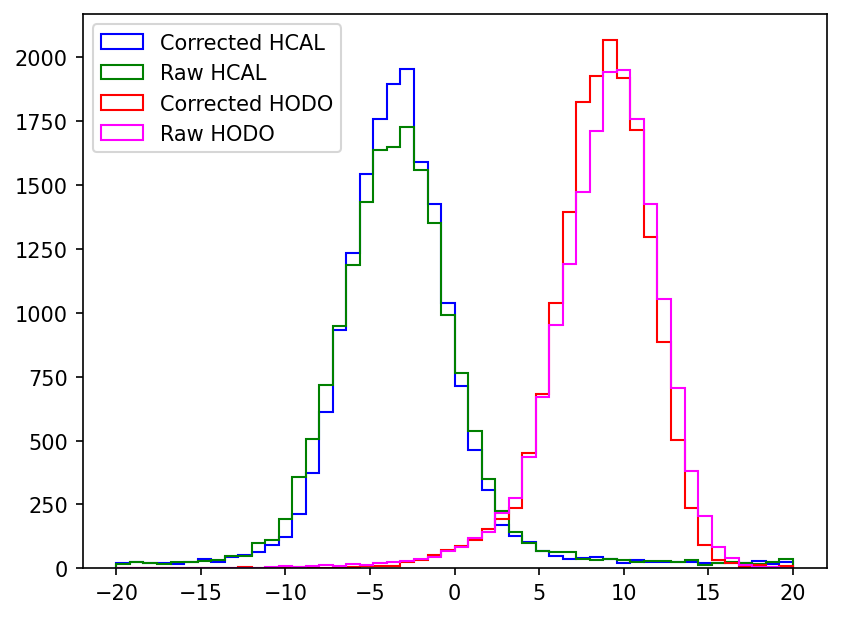

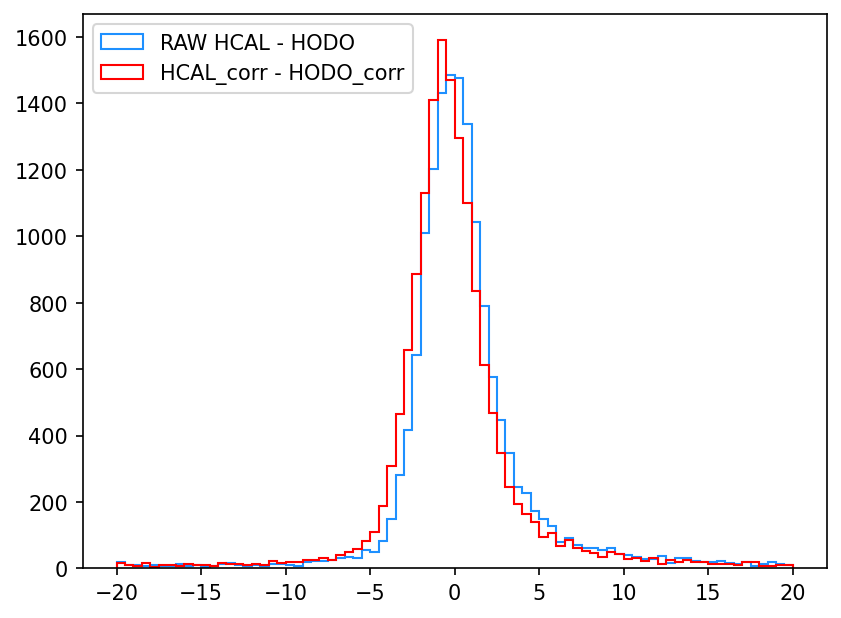

In [143]:
plt.figure(dpi=150)

d=plt.hist(HCalcorrected[cut]-5,bins=50,range=(-20,20),histtype='step',label="Corrected HCAL",color='blue')
d=plt.hist(tdctimeblk[cut]-8,bins=50,range=(-20,20),histtype='step',label="Raw HCAL",color='green')


d=plt.hist(HODOcorrected[cut][~np.isnan(HODOcorrected[cut])]+3+4,histtype='step',
           bins=50,range=(-20,20),color='red',label='Corrected HODO')
d=plt.hist(HODOraw[cut][~np.isnan(HODOcorrected[cut])]+5,histtype='step',
           bins=50,range=(-20,20),color='magenta',label='Raw HODO')
plt.legend(loc='upper left')

plt.show()
plt.figure(dpi=150)

finalnancheck=(~np.isnan(HCalcorrected[cut]))&(~np.isnan(HODOcorrected[cut]))

#d=plt.hist(HCalcorrected[cut]-HODOraw[cut],bins=100,range=(-20,20))
d=plt.hist(tdctimeblk[cut][finalnancheck]-HODOraw[cut][finalnancheck],
           bins=80,range=(-20,20),histtype='step',color='dodgerblue',label="RAW HCAL - HODO")
d=plt.hist(HCalcorrected[cut][finalnancheck]-HODOcorrected[cut][finalnancheck],
           bins=80,range=(-20,20),histtype='step',color='red',label="HCAL_corr - HODO_corr")
plt.legend(loc='upper left')

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Initialize collectors
HCalcorr_list, HCalraw_list = [], []
HODOcorr_list, HODOraw_list = [], []
tdctimeblk_list = []

i = 0
while os.path.exists(f"{base_dir}/timingtest{i}.npz"):
    print(f"Loading chunk {i}")
    data = np.load(f"{base_dir}/timingtest{i}.npz")
    w2 = data["W2"]
    dy=data["dy"]
    dx=data["dx"]
    cut=(W2min<w2)&(W2max>w2)&(dymin<dy)&(dymax>dy)&(dxmin<dx)&(dxmax>dx)
    
    # Apply corrections
    HCalcorr = applyHCALCorrection(
        data["cblkid"][cut], data["cblke"][cut], data["cblktime"][cut], data["nblk"][cut],
        data["pN_expected"][cut], data["npathl"][cut], t1, w0, w1
    )
    HODOcorr = applyHodoCorrection(
        data["tleft"][cut], data["tright"][cut], data["totleft"][cut], data["totright"][cut],
        data["barid"][cut], data["nbars"][cut], data["pathl"][cut], data["tr_y"][cut], data["tr_ph"][cut],
        HODOt0, HODOwL, HODOwR, vscint_fixed
    )
    
    
    # Define a good event cut
    valid = (
        ~np.isnan(HCalcorr) &
        ~np.isnan(HODOcorr)
    )

    # Store arrays
    HCalcorr_list.append(HCalcorr[valid])
    HCalraw_list.append(data["tdctimeblk"][cut][valid])
    HODOcorr_list.append(HODOcorr[valid])
    HODOraw_list.append(data["HODOtmean"][cut][valid])  # or compute it yourself
    #tdctimeblk_list.append(data["tdctimeblk"][valid])

    i += 1

    
# Flatten everything
HCalcorr = np.concatenate(HCalcorr_list)
HCalraw = np.concatenate(HCalraw_list)
HODOcorr = np.concatenate(HODOcorr_list)
HODOraw = np.concatenate(HODOraw_list)
#tdctimeblk = np.concatenate(tdctimeblk_list)


Loading chunk 0
Loading chunk 1
Loading chunk 2
Loading chunk 3
Loading chunk 4
Loading chunk 5
Loading chunk 6
Loading chunk 7
Loading chunk 8
Loading chunk 9


In [167]:
HODOcorr[np.isnan(HODOcorr)]

array([], dtype=float64)

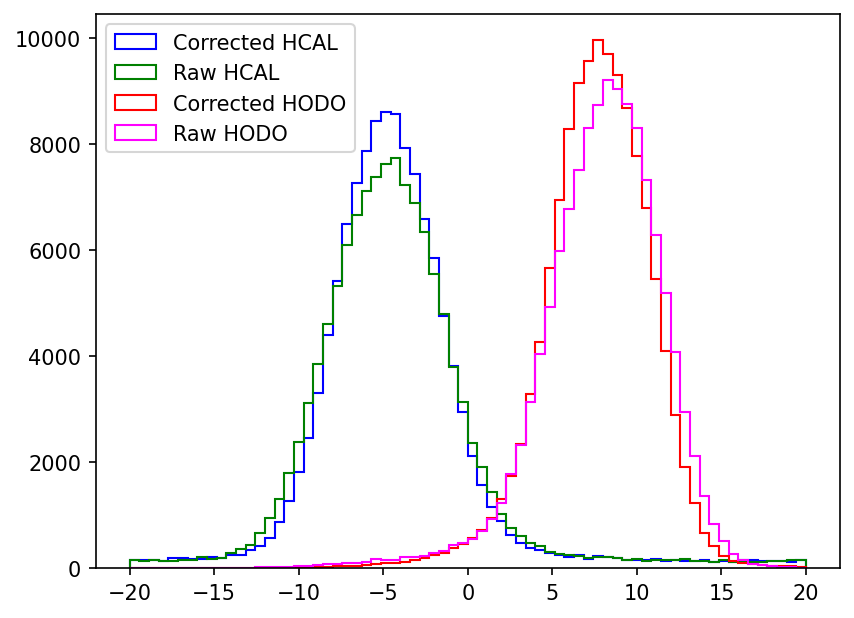

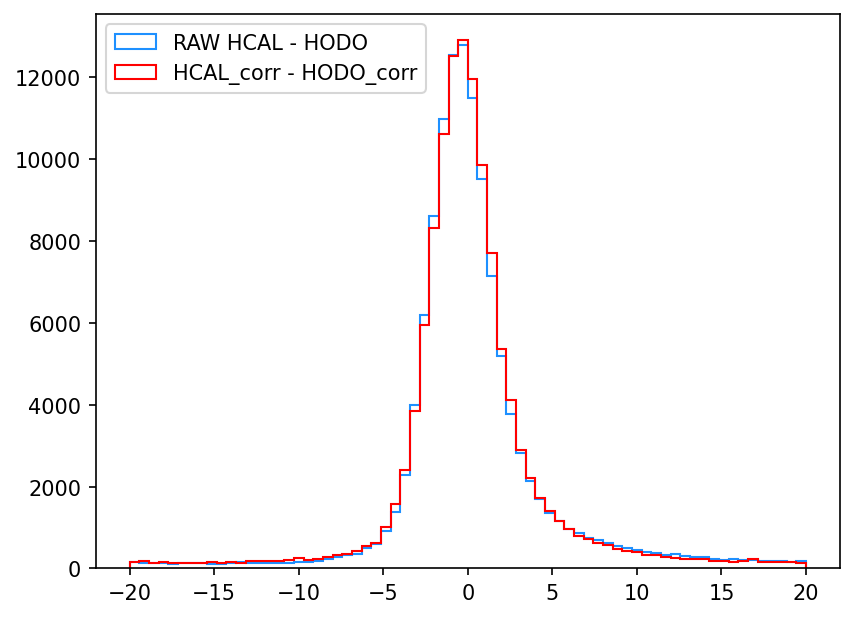

In [168]:
plt.figure(dpi=150)
binnum=70
plt.hist(HCalcorr - 5, bins=binnum, range=(-20, 20), histtype='step', label="Corrected HCAL", color='blue')
plt.hist(HCalraw - 8, bins=binnum, range=(-20, 20), histtype='step', label="Raw HCAL", color='green')
plt.hist(HODOcorr + 7, bins=binnum, range=(-20, 20), histtype='step', label='Corrected HODO', color='red')
plt.hist(HODOraw + 5, bins=binnum, range=(-20, 20), histtype='step', label='Raw HODO', color='magenta')
plt.legend(loc='upper left')
plt.show()

plt.figure(dpi=150)
plt.hist(HCalraw - HODOraw, bins=binnum, range=(-20, 20), histtype='step', color='dodgerblue', label="RAW HCAL - HODO")
plt.hist(HCalcorr - HODOcorr+.5, bins=binnum, range=(-20, 20), histtype='step', color='red', label="HCAL_corr - HODO_corr")
plt.legend(loc='upper left')
plt.show()


In [ ]:
plt.figure(dpi=200)
ntof=calc_tof(npathl,pN_expect,.938)
ntof0=calc_tof(17,pN_expect,.938)
d=plt.hist(ntof,bins=100,histtype='step',label="Using npathl")
d=plt.hist(ntof0,bins=100,histtype='step',label="Using 17m")
plt.title("Neutron TOF expected and nominal")

pathcalcstr="""TVector3 hcal_actual_hit = HCAL_origin
                         + xHCAL[0] * HCAL_axes[0]
                         + yHCAL[0] * HCAL_axes[1];
    double pathlength_actual = (hcal_actual_hit - vertex).Mag();"""
plt.legend(loc='lower right')
plt.text(60,40000,pathcalcstr,fontsize=8)

Text(0.5, 1.0, 'ntof-ntof0')

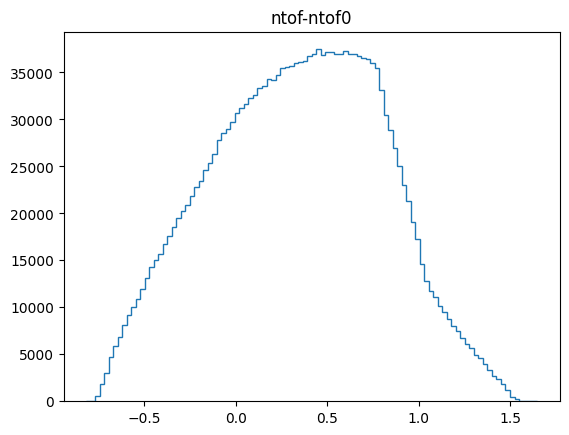

In [32]:
d=plt.hist(ntof-ntof0,bins=100,histtype='step')
plt.title("ntof-ntof0")

In [98]:
from matplotlib.backends.backend_pdf import PdfPages


def BuildHistos_HCAL(hcal_blk_id, hcal_blk_e, hcal_blk_tdctime, nblks,pN_expect,npathl, t1, w0, w1, output_pdf="hcal_histograms.pdf", n_blocks=288):
    """
    Build and save HCAL timewalk correction histograms for each block.
    Plots raw and corrected timing vs energy.
    """
    hist_data = {
        b: {
            "t_raw": [],
            "t_corr": [],
            "E": []
        } for b in range(n_blocks)
    }

    for i in range(len(nblks)):
        nhcal = nblks[i]
        if nhcal > 10:
            nhcal = 10
        ntof0=calc_tof(17,pN_expect[i],.938)        
        ntof=calc_tof(npathl[i],pN_expect[i],.938)-ntof0
        for j in range(int(nhcal)):
            b = int(hcal_blk_id[i][j]) - 1
            if b < 0 or b >= n_blocks:
                continue

            e = hcal_blk_e[i][j]
            t = hcal_blk_tdctime[i][j]-ntof
            if not np.isfinite(e) or not np.isfinite(t) or e <= 0:
                continue
            if abs(t)>200: 
                nhcal-=1 
                continue

            t_corr = t - t1[b] - w0[b] * e - w1[b] / np.sqrt(e)
            if abs(t_corr)>200:
                print("dam")
                continue
            hist_data[b]["t_raw"].append(t)
            hist_data[b]["t_corr"].append(t_corr)
            hist_data[b]["E"].append(e)

    with PdfPages(output_pdf) as pdf:
        for b in range(n_blocks):
            fig, axs = plt.subplots(2, 2, figsize=(12, 10))
            fig.suptitle(f"HCAL Block {b} - Timing Calibration", fontsize=16)

            axs[0, 0].hist(hist_data[b]["t_raw"], bins=100, alpha=0.75)
            axs[0, 0].set_title("Raw Time")
            axs[0, 0].set_xlabel("Time [ns]")
            axs[0, 0].set_ylabel("Entries")

            axs[0, 1].hist(hist_data[b]["t_corr"], bins=100, alpha=0.75)
            axs[0, 1].set_title("Corrected Time")
            axs[0, 1].set_xlabel("Time [ns]")
            axs[0, 1].set_ylabel("Entries")

            axs[1, 0].hist2d(hist_data[b]["E"], hist_data[b]["t_raw"], bins=100)
            axs[1, 0].set_title("Raw Time vs Energy")
            axs[1, 0].set_xlabel("Energy [GeV]")
            axs[1, 0].set_ylabel("Time [ns]")

            axs[1, 1].hist2d(hist_data[b]["E"], hist_data[b]["t_corr"], bins=100)
            axs[1, 1].set_title("Corrected Time vs Energy")
            axs[1, 1].set_xlabel("Energy [GeV]")
            axs[1, 1].set_ylabel("Time [ns]")

            plt.tight_layout(rect=[0, 0, 1, 0.96])
            pdf.savefig(fig)
            plt.close(fig)

    print(f"Histograms saved to {output_pdf}")


In [99]:
BuildHistos_HCAL(
    cblkid[cut],
    cblke[cut],
    cblktime[cut],
    nblk[cut],
    pN_expect[cut],
    npathl[cut],
    t1=t1, w0=w0, w1=w1,
    output_pdf="hcal_correction_plots.pdf"
)


dam
dam
dam
dam
dam
dam
dam
dam
dam
Histograms saved to hcal_correction_plots.pdf
